In [207]:
from matplotlib import pyplot as plt
from polyleven import levenshtein
from collections import Counter
from itertools import product
import seaborn as sns
import pandas as pd
import numpy as np
import os 

In [48]:
%load_ext rpy2.ipython

In [49]:
%%R
library(ggplot2)

### 1) Find the most frequent V and J segments

#### FMBA (TRA) associated clones find by T-test 

In [47]:
#import of features
folder_to_file="../../fmba/"
file_name="FMBA_TRA_sign_clones_ttest_top2000.tsv"

associated_clones=pd.read_csv(folder_to_file+file_name, sep = '\t', index_col=0)
associated_clones=list(associated_clones.index.values)
associated_clones=list(filter(str.isalpha, associated_clones))
associated_clones=associated_clones[:1000]
print("Top of", len(associated_clones))


Top of 1000


In [9]:
pool=pd.read_csv("/projects/fmba_covid/fmba_new/pool/TRA.pool.aa.table.txt", sep = '\t') 

In [106]:
#let's create clone and segment correspondence dictionary
dct_pool_v=dict(zip(list(pool.cdr3aa), list(pool.v)))
dct_pool_j=dict(zip(list(pool.cdr3aa), list(pool.j)))

dct_accosiated_clones_v={x:dct_pool_v[x] for x in associated_clones}
dct_accosiated_clones_j={x:dct_pool_j[x] for x in associated_clones}
dct_accosiated_clones_vj={x:dct_pool_v[x]+'*'+dct_pool_j[x] for x in associated_clones}

In [293]:
v_segments=dict(Counter(list(dct_accosiated_clones_v.values())))
print('V:', v_segments)
print('Number of V:', len(v_segments))
#v_segments=Counter(list(dct_accosiated_clones_v.values())).most_common()
#print('\nSorting:\n', v_segments)
#v_segments=[i[0] for i in v_segments]

j_segments=dict(Counter(list(dct_accosiated_clones_j.values())))
print('\nJ:', j_segments)
print('Number of J:', len(j_segments))
#j_segments=Counter(list(dct_accosiated_clones_j.values())).most_common()
#print('\nSorting:\n', j_segments)
#j_segments=[i[0] for i in j_segments]

vj_segments=dict(Counter(list(dct_accosiated_clones_vj.values())))
#print('\nVJ:', vj_segments)
vj_segments=Counter(list(dct_accosiated_clones_vj.values())).most_common()
print('\nSorting:\n', vj_segments[:47])
vj_segments=[i[0] for i in vj_segments[:12]]

V: {'TRAV1-2': 28, 'TRAV2': 62, 'TRAV21': 145, 'TRAV41': 10, 'TRAV9-2': 80, 'TRAV17': 62, 'TRAV27': 55, 'TRAV8-6': 35, 'TRAV12-2': 15, 'TRAV20': 25, 'TRAV22': 6, 'TRAV24': 22, 'TRAV25': 36, 'TRAV16': 40, 'TRAV35': 24, 'TRAV13-1': 20, 'TRAV1-1': 6, 'TRAV6': 60, 'TRAV12-3': 26, 'TRAV8-4': 30, 'TRAV38-2DV8': 16, 'TRAV19': 49, 'TRAV23DV6': 11, 'TRAV8-3': 15, 'TRAV5': 6, 'TRAV39': 30, 'TRAV8-1': 10, 'TRAV38-1': 2, 'TRAV8-2': 2, 'TRAV3': 6, 'TRAV36DV7': 3, 'TRAV26-1': 15, 'TRAV13-2': 4, 'TRAV40': 5, 'TRAV12-1': 7, 'TRAV10': 20, 'TRAV29DV5': 4, 'TRAV14DV4': 4, 'TRAV26-2': 4}
Number of V: 39

J: {'TRAJ34': 199, 'TRAJ37': 13, 'TRAJ57': 134, 'TRAJ10': 4, 'TRAJ22': 86, 'TRAJ8': 25, 'TRAJ5': 10, 'TRAJ45': 32, 'TRAJ38': 56, 'TRAJ58': 70, 'TRAJ47': 39, 'TRAJ35': 11, 'TRAJ56': 42, 'TRAJ49': 22, 'TRAJ28': 15, 'TRAJ54': 18, 'TRAJ32': 7, 'TRAJ42': 13, 'TRAJ16': 14, 'TRAJ43': 18, 'TRAJ20': 28, 'TRAJ11': 5, 'TRAJ17': 14, 'TRAJ40': 30, 'TRAJ39': 11, 'TRAJ13': 4, 'TRAJ33': 6, 'TRAJ31': 9, 'TRAJ4': 2, 'TRAJ5

In [294]:
v_segments_frequency=pd.DataFrame({'frequency': list(map(lambda x: x/1000, list(v_segments.values())))}, index=list(v_segments.keys()))
v_segments_frequency.index.name = 'v_segments'
j_segments_frequency=pd.DataFrame({'frequency': list(map(lambda x: x/1000, list(j_segments.values())))}, index=list(j_segments.keys()))
j_segments_frequency.index.name = 'j_segments'

segments_summary_table=pd.DataFrame({'v_segments': list(dct_accosiated_clones_v.values()),
                                     'j_segments': list(dct_accosiated_clones_j.values()), 'vj_segments': list(dct_accosiated_clones_vj.values())}, index=associated_clones)
segments_summary_table.index.name = 'cdr3aa'

segments_summary_table.to_csv("FMBA(TRA)/segments_summary_table.tsv", sep='\t')
segments_summary_table_most_common=segments_summary_table.loc[segments_summary_table['vj_segments'].isin(vj_segments)]

v_segments_frequency.to_csv("FMBA(TRA)/v_segments_frequency.tsv", sep='\t')
j_segments_frequency.to_csv("FMBA(TRA)/j_segments_frequency.tsv", sep='\t')
segments_summary_table_most_common.to_csv("FMBA(TRA)/segments_summary_table_most_common.tsv", sep='\t')

In [313]:
segments_summary_table_most_common[0:30]

,v_segments,j_segments,vj_segments
cdr3aa,,,
CAVGNTDKLIF,TRAV2,TRAJ34,TRAV2*TRAJ34
CAVRNTDKLIF,TRAV21,TRAJ34,TRAV21*TRAJ34
CAVNNTDKLIF,TRAV21,TRAJ34,TRAV21*TRAJ34
CAVQNTDKLIF,TRAV2,TRAJ34,TRAV2*TRAJ34
CALSQGGSEKLVF,TRAV9-2,TRAJ57,TRAV9-2*TRAJ57
CAVWNTDKLIF,TRAV2,TRAJ34,TRAV2*TRAJ34
CALSAQGGSEKLVF,TRAV9-2,TRAJ57,TRAV9-2*TRAJ57
CAVHNTDKLIF,TRAV21,TRAJ34,TRAV21*TRAJ34
CAVTPQGGSEKLVF,TRAV21,TRAJ57,TRAV21*TRAJ57


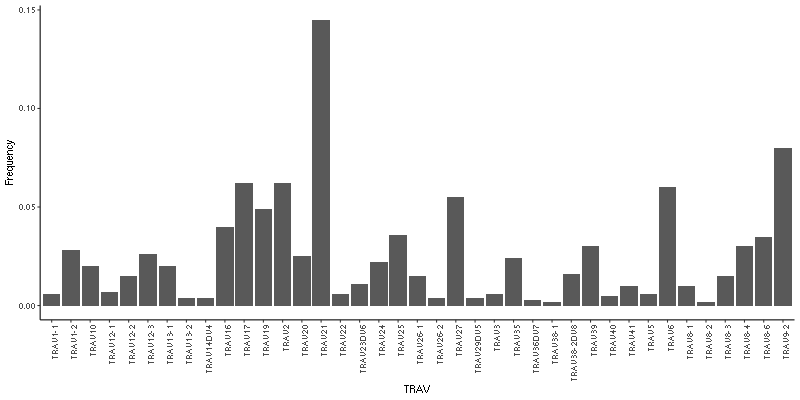

In [135]:
%%R -w 800 -h 400
segments_summary_table=read.csv("FMBA(TRA)/segments_summary_table.tsv", sep='\t', header=TRUE)
segments_summary_table$v_segments=as.factor(segments_summary_table$v_segments)
#segments_summary_table$j_segments=as.factor(v_segments_frequency$j_segments)

ggplot(segments_summary_table, aes(x=v_segments)) +
 geom_bar(aes(y = ..prop.., group = 1))  + 
# geom_histogram(aes(y = ..density..)) +
 theme_classic() +
 theme(axis.text.x = element_text(angle=90, hjust=1)) +  
 labs(y = "Frequency", x='TRAV')

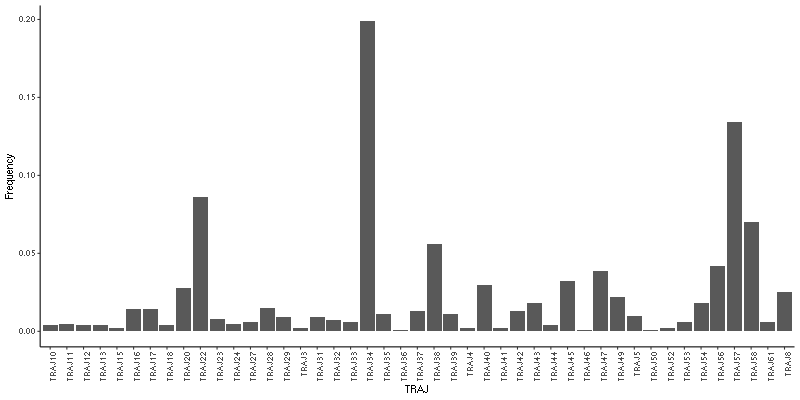

In [132]:
%%R -w 800 -h 400
segments_summary_table=read.csv("FMBA(TRA)/segments_summary_table.tsv", sep='\t', header=TRUE)
#segments_summary_table$v_segments=as.factor(segments_summary_table$v_segments)
segments_summary_table$j_segments=as.factor(segments_summary_table$j_segments)

ggplot(segments_summary_table, aes(x=j_segments)) +
 geom_bar(aes(y = ..prop.., group = 1))  + 
 theme_classic() +
 theme(axis.text.x = element_text(angle=90, hjust=1)) +  
 labs(y = "Frequency", x='TRAJ')

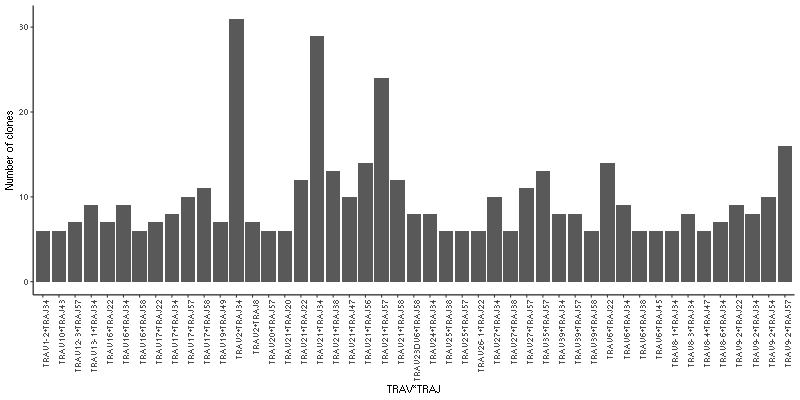

In [133]:
%%R -w 800 -h 400
segments_summary_table=read.csv("FMBA(TRA)/segments_summary_table_most_common.tsv", sep='\t', header=TRUE)
#segments_summary_table$v_segments=as.factor(segments_summary_table$v_segments)
segments_summary_table$vj_segments=as.factor(segments_summary_table$vj_segments)

ggplot(segments_summary_table, aes(x=vj_segments)) +
 geom_bar()  + 
 theme_classic() +
 theme(axis.text.x = element_text(angle=90, hjust=1)) +  
 labs(y = "Number of clones", x='TRAV*TRAJ')

### 2) MDS

In [140]:
#Levenshtein distance
def leven(Z):
    X,Y = iter(Z)
    scr = levenshtein(X, Y)
    return scr

In [295]:
#Make paiwize distance matrix
analyzed_clones=list(segments_summary_table_most_common.index.values)

comb = list(product(analyzed_clones, analyzed_clones))
print("lenght of array:", len(comb))
lev = list(map(leven, comb))
print('unique values:', set(lev))
mm = np.array(lev)
mm.shape = (len(analyzed_clones), len(analyzed_clones))
distance_matrix_leven = pd.DataFrame(np.array(mm), index=analyzed_clones, columns=analyzed_clones)

lenght of array: 40000
unique values: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}


In [296]:
from sklearn.metrics import pairwise_distances

D = pairwise_distances(distance_matrix_leven)
D.shape

(200, 200)

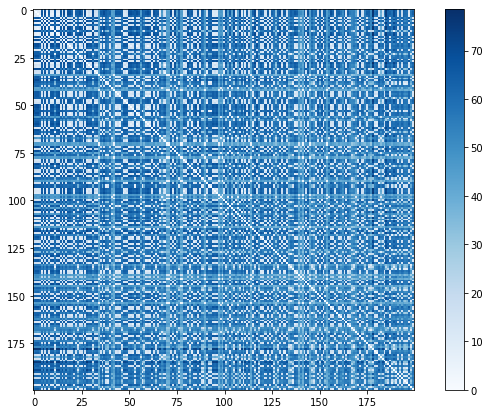

In [302]:
plt.imshow(D, zorder=2, cmap='Blues', interpolation='nearest')
plt.colorbar();

In [297]:
palette = sns.color_palette("Paired", 12)
cdict=dict(zip(vj_segments, palette))
group = np.array(list(segments_summary_table_most_common['vj_segments']))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

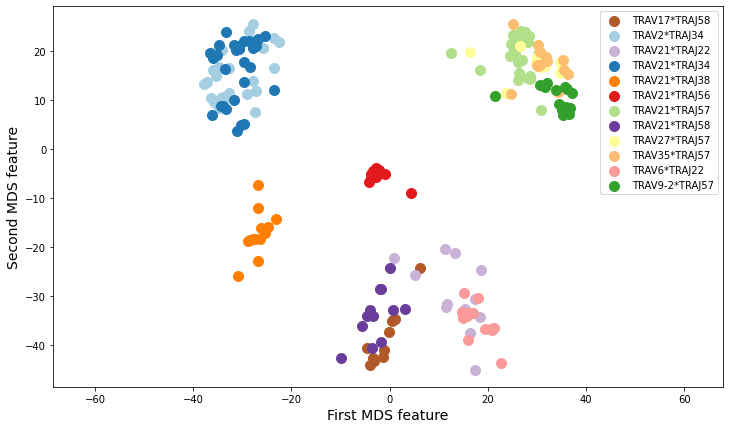

In [312]:
from sklearn.manifold import MDS

plt.rcParams['figure.figsize'] = [12, 7]

model = MDS(n_components=2, dissimilarity='precomputed', random_state=1)
out = model.fit_transform(D)

fig, ax = plt.subplots()
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(out[ix, 0], out[ix, 1], c = cdict[g], label = g, s = 100)
ax.legend(loc='upper right',  numpoints=0.5)
plt.xlabel('First MDS feature', fontsize=14)
plt.ylabel('Second MDS feature', fontsize=14)
plt.axis('equal');

In [292]:
palette = sns.color_palette("Paired", 12)

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]